# Практическая работа №5


## Тема: «Логистическая регрессия»

### Выполнил студент: Кондратов Данил

### ВАРИАНТ: (ваш dataset [название, ссылка])

<p>Линейная регрессия и логистическая регрессия являются двумя популярными статистическими методами, используемыми для анализа данных. Они оба используются для прогнозирования значений на основе набора входных данных, но они применяются в разных контекстах и имеют разные цели.</p>

### Логистическая регрессия


<p>Простейший алгоритм классификации, пришел к нам из мира статистики. Позволяет разделять на два класса несложные объекты, чье состояние управляется и описывается небольшим числом параметров.</p>

<p>Логистическая регрессия выдает ответ в виде числа в промежутке от 0 до 1. Если число ниже определенного порога значения — то объект относится к первому классу объектов, а если выше — то ко второму. Калибровка порогового значения для разделения объектов на классы подбирается в ходе калибровки алгоритма.Логистическая регрессия, с другой стороны, используется для прогнозирования вероятности возникновения события на основе одного или нескольких независимых переменных. Она строит логистическую кривую, которая представляет собой S-образную кривую, используемую для моделирования вероятности.</p>

#### Основные характеристики логистической регрессии:

<ul>
    <li><b>Цель:</b> Прогнозирование вероятности возникновения события.</li>
    </br>
    <li><b>Модель:</b> Логистическая функция независимых переменных.</li>
    </br>
    <li><b>Применение:</b> Там, где требуется несложная классификация малого числа объектов на малое число классов. Используется в статистике, экономике, социологии и других областях для прогнозирования вероятности.</li>
    </br>
    <li><b>Плюсы.</b> Скорость и наглядность.</li>
    </br>
     <li><b>Минусы.</b> Может классифицировать только относительно простые объекты. Не подходит для разделения объектов на несколько классов, ответ этого алгоритма — по сути, двоичный сигнал типа «да-нет».</li>
</ul>    

<img text align="left"  src="картинка2.png" alt="картинка">

### Отличия


<ol>
    <li><b>Цель прогнозирования:</b> Линейная регрессия предназначена для прогнозирования непрерывных значений, в то время как логистическая регрессия используется для прогнозирования вероятности возникновения события.</li>
    </br>
    <li><b>Функция модели:</b> Линейная регрессия использует линейную функцию для моделирования, в то время как логистическая регрессия использует логистическую функцию.</li>
    </br>
    <li><b>Применение:</b> Линейная регрессия широко используется в различных областях для прогнозирования непрерывных переменных, в то время как логистическая регрессия часто используется в статистике и социологии для прогнозирования вероятности.</li>
    </br>
    <li><b>Результаты:</b> Линейная регрессия дает прямое значение зависимой переменной, в то время как логистическая регрессия дает вероятность, что событие произойдет.</li>
</ol>    

<p>Выбор между линейной и логистической регрессией зависит от целей анализа и типа данных, с которыми вы работаете.</p>

<p>В контексте машинного обучения, логистическая регрессия часто используется для бинарной классификации, где цель состоит в том, чтобы предсказать, к какой из двух групп относится объект.</p>

<p>Пример Применения Логистической Регрессии на Датасете Титаник Для примера применения логистической регрессии на датасете Титаник, мы можем попытаться предсказать, выживет ли пассажир на Титанике на основе таких признаков, как пол, возраст, класс пассажира и другие.</p>

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [3]:
# Загрузка данных
#data = pd.read_csv('titanic.csv')

# Загрузка датасета
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# Обработка пропущенных значений
#data = data.dropna()
data.Age = data.Age.fillna(data.Age.mean())

# Выбор признаков
features = data[['Pclass', 'Age', 'Sex']]
target = data['Survived']

In [4]:
features

,Pclass,Age,Sex
0,3,22.000000,male
1,1,38.000000,female
2,3,26.000000,female
3,1,35.000000,female
4,3,35.000000,male
...,...,...,...
886,2,27.000000,male
887,1,19.000000,female
888,3,29.699118,female
889,1,26.000000,male


<Axes: >

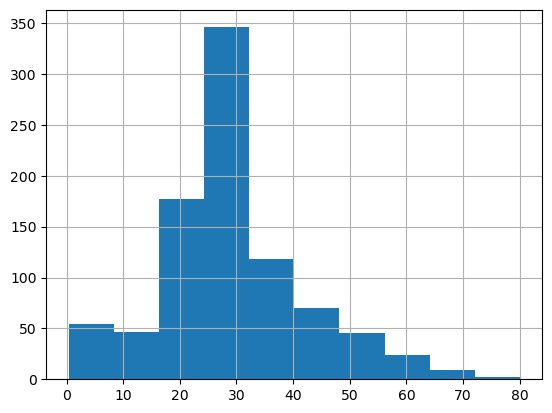

In [5]:
features.Age.hist()

In [6]:
gender_mapping = {'male': 0, 'female': 1}

#features = features['Sex'].replace(gender_mapping)
features['Sex'] = features['Sex'].map({'male': 0, 'female': 1})

C:\Users\Данил\AppData\Local\Temp\ipykernel_17896\2431505523.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Sex'] = features['Sex'].map({'male': 0, 'female': 1})


In [7]:
features

,Pclass,Age,Sex
0,3,22.000000,0
1,1,38.000000,1
2,3,26.000000,1
3,1,35.000000,1
4,3,35.000000,0
...,...,...,...
886,2,27.000000,0
887,1,19.000000,1
888,3,29.699118,1
889,1,26.000000,0


In [8]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Стандартизация признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Создание и обучение модели
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [10]:
# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка модели
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[90 15]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



<p>Этот пример демонстрирует базовый процесс применения логистической регрессии для бинарной классификации на датасете Титаник. Важно отметить, что выбор признаков и их преобразование могут сильно влиять на результаты модели, поэтому важно проводить эксперименты с различными наборами признаков и методами их обработки.</p>

#### Задача

<p>Определить с какой вероятностью выживет пассажир возростом 25 лет</p>

<p>Для решения этой задачи мы будем использовать библиотеку pandas для работы с данными, numpy для математических операций, и sklearn для построения и оценки модели логистической регрессии. В качестве примера датасета мы будем использовать датасет Titanic, который доступен в библиотеке seaborn.</p>

<p>Установка необходимых библиотек:</p>

<p>Если у вас еще не установлены необходимые библиотеки, вы можете установить их с помощью команды pip install pandas numpy seaborn sklearn.</p>

<p>Загрузка и подготовка данных: Загрузим датасет Titanic, отфильтруем его, чтобы оставить только пассажиров возрастом 25 лет, и подготовим данные для обучения модели. Построение и обучение модели: Используем логистическую регрессию из sklearn для обучения модели на подготовленных данных. Оценка модели: Оценим качество модели, используя тестовые данные.</p>

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns

import warnings
# Игнорировать все предупреждения
warnings.filterwarnings('ignore')

# Загрузка датасета Titanic
titanic = sns.load_dataset('titanic')

# Фильтрация данных для пассажиров возрастом 25 лет
titanic_25 = titanic[titanic['age'] == 25]

# Подготовка данных: выбор признаков и целевой переменной
X = titanic_25[['pclass', 'sex', 'embarked']].dropna()
y = titanic_25['survived']

# Преобразование категориальных переменных в числовые
X['sex'] = X['sex'].map({'male': 0, 'female': 1})
X['embarked'] = X['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Построение и обучение модели
model = LogisticRegression()
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (выживет с вероятносью:): {accuracy}")

Accuracy (выживет с вероятносью:): 0.8


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

import warnings
# Игнорировать все предупреждения
warnings.filterwarnings('ignore')


from sklearn.metrics import classification_report, confusion_matrix

# Загрузка датасета Titanic
titanic = sns.load_dataset('titanic')

# Фильтрация данных для пассажиров возрастом 25 лет
titanic_25 = titanic[titanic['age'] == 25]

# Подготовка данных: выбор признаков и целевой переменной
X = titanic_25[['pclass', 'sex', 'embarked', 'fare']].dropna()
y = titanic_25['survived']

# Преобразование категориальных переменных в числовые
X['sex'] = X['sex'].map({'male': 0, 'female': 1})
X['embarked'] = X['embarked'].map({'S': 0, 'C': 1, 'Q': 2})
#X['alone'] = X['alone'].map({False: 0, True: 1})

# Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Построение и обучение модели
model = LogisticRegression()
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



### Задание 1. Загрузить данные из dataset "Титаник"

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

import warnings
# Игнорировать все предупреждения
warnings.filterwarnings('ignore')


from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import train_test_split

data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Задание 2. Произвести предобработку данных dataset "Титаник" и сохранить результаты каждый в отдельный датафрейм
<ol>
<li>Удалить все путые заначения и сохранить результаты в датафрейм df_del</li>
<li>Замена на конкретное значение все путые и сохранить результаты в датафрейм df_num</li>
<li>Заменить все путые заначения на среднее значение и сохранить результаты в датафрейм df_means</li>
<li>Заменить все путые заначения на медеанные значение и сохранить результаты в датафрейм df_medians</li>
<li>Замена на предыдущее или следующее значение и сохранить результаты в датафрейм df_fb_fill</li>
</ol>

In [3]:
df_del = data.dropna()
df_del

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [4]:
df_num = data.fillna(3.14)
df_num

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,3.14,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,3.14,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,3.14,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.0000,3.14,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,3.14,1,2,W./C. 6607,23.4500,3.14,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.0000,C148,C


In [5]:
df_means = data.fillna(data.Fare.mean())
df_means

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,32.204208,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,32.204208,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,32.204208,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,32.204208,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,32.204208,1,2,W./C. 6607,23.4500,32.204208,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [6]:
df_medians = data.fillna(data.Fare.median())
df_medians

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,7.2500,14.4542,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,14.4542,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0000,0,0,373450,8.0500,14.4542,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0000,0,0,211536,13.0000,14.4542,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,14.4542,1,2,W./C. 6607,23.4500,14.4542,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0000,0,0,111369,30.0000,C148,C


In [7]:
df_fb_fill = data.fillna(method  = 'ffill')
df_fb_fill

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,C50,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,19.0,1,2,W./C. 6607,23.4500,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Задание 3. Применить к каждому датафрейму алгоритм логистической регрессии

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
# Игнорировать все предупреждения
warnings.filterwarnings('ignore')

# Фильтрация данных для пассажиров возрастом 25 лет
df_del_25 = df_del[df_del['Age'] == 25]

# Подготовка данных: выбор признаков и целевой переменной
X = df_del_25[['Pclass', 'Sex', 'Embarked']]
y = df_del_25['Survived']

# Преобразование категориальных переменных в числовые
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})
X['Embarked'] = X['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Построение и обучение модели
model = LogisticRegression()
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
# Игнорировать все предупреждения
warnings.filterwarnings('ignore')

# Фильтрация данных для пассажиров возрастом 25 лет
df_num_25 = df_num[df_num['Age'] == 25]

# Подготовка данных: выбор признаков и целевой переменной
X1 = df_num_25[['Pclass', 'Sex', 'Embarked']]
y1 = df_num_25['Survived']

# Преобразование категориальных переменных в числовые
X1['Sex'] = X1['Sex'].map({'male': 0, 'female': 1})
X1['Embarked'] = X1['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Разделение данных на обучающую и тестовую выборки
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Построение и обучение модели
model = LogisticRegression()
model.fit(X1_train, y1_train)

# Предсказание на тестовых данных
y1_pred = model.predict(X1_test)

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
# Игнорировать все предупреждения
warnings.filterwarnings('ignore')

# Фильтрация данных для пассажиров возрастом 25 лет
df_fb_fill_25 = df_fb_fill[df_fb_fill['Age'] == 25]

# Подготовка данных: выбор признаков и целевой переменной
X2 = df_fb_fill_25[['Pclass', 'Sex', 'Embarked']]
y2 = df_fb_fill_25['Survived']

# Преобразование категориальных переменных в числовые
X2['Sex'] = X2['Sex'].map({'male': 0, 'female': 1})
X2['Embarked'] = X2['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Разделение данных на обучающую и тестовую выборки
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Построение и обучение модели
model = LogisticRegression()
model.fit(X2_train, y2_train)

# Предсказание на тестовых данных
y2_pred = model.predict(X2_test)

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
# Игнорировать все предупреждения
warnings.filterwarnings('ignore')

# Фильтрация данных для пассажиров возрастом 25 лет
df_means_25 = df_means[df_means['Age'] == 25]

# Подготовка данных: выбор признаков и целевой переменной
X3 = df_means_25[['Pclass', 'Sex', 'Embarked']]
y3 = df_means_25['Survived']

# Преобразование категориальных переменных в числовые
X3['Sex'] = X3['Sex'].map({'male': 0, 'female': 1})
X3['Embarked'] = X3['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Разделение данных на обучающую и тестовую выборки
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Построение и обучение модели
model = LogisticRegression()
model.fit(X3_train, y3_train)

# Предсказание на тестовых данных
y3_pred = model.predict(X3_test)

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
# Игнорировать все предупреждения
warnings.filterwarnings('ignore')

# Фильтрация данных для пассажиров возрастом 25 лет
df_medians_25 = df_medians[df_medians['Age'] == 25]

# Подготовка данных: выбор признаков и целевой переменной
X4 = df_medians_25[['Pclass', 'Sex', 'Embarked']]
y4 = df_medians_25['Survived']

# Преобразование категориальных переменных в числовые
X4['Sex'] = X4['Sex'].map({'male': 0, 'female': 1})
X4['Embarked'] = X4['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Разделение данных на обучающую и тестовую выборки
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

# Построение и обучение модели
model = LogisticRegression()
model.fit(X4_train, y4_train)

# Предсказание на тестовых данных
y4_pred = model.predict(X4_test)

### Задание 4. Произвести оценку обученности модели разными метриками
<ol>
<li>accuracy</li>
<li>recall</li>
<li>Precision</li>
<li>F1-Score</li>
</ol>

In [13]:
accuracy_df_del = accuracy_score(y_test, y_pred)
print(f"Accuracy (выживет с вероятносью:): {accuracy_df_del}")
print(classification_report(y_test, y_pred))

Accuracy (выживет с вероятносью:): 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



In [14]:
accuracy_df_num = accuracy_score(y1_test, y1_pred)
print(f"Accuracy (выживет с вероятносью:): {accuracy_df_num}")
print(classification_report(y1_test, y1_pred))

Accuracy (выживет с вероятносью:): 0.8
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



In [15]:
accuracy_df_fb_fill = accuracy_score(y2_test, y2_pred)
print(f"Accuracy (выживет с вероятносью:): {accuracy_df_fb_fill}")
print(classification_report(y2_test, y2_pred))

Accuracy (выживет с вероятносью:): 0.8333333333333334
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.00      0.00      0.00         1

    accuracy                           0.83         6
   macro avg       0.42      0.50      0.45         6
weighted avg       0.69      0.83      0.76         6



In [16]:
accuracy_df_means = accuracy_score(y3_test, y3_pred)
print(f"Accuracy (выживет с вероятносью:): {accuracy_df_means}")
print(classification_report(y3_test, y3_pred))

Accuracy (выживет с вероятносью:): 0.8
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



In [17]:
accuracy_df_medians = accuracy_score(y4_test, y4_pred)
print(f"Accuracy (выживет с вероятносью:): {accuracy_df_medians}")
print(classification_report(y4_test, y4_pred))

Accuracy (выживет с вероятносью:): 0.8
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



### Задание 5. Определить наиболее эффективную метрику

In [18]:
for i in range (1,5):
    max = 0
    if accuracy_df_del>max:
        max = accuracy_df_del
    if accuracy_df_num>max:
        max = accuracy_df_num
    if accuracy_df_means>max:
        max = accuracy_df_means
    if accuracy_df_medians>max:
        max = accuracy_df_medians
    if accuracy_df_fb_fill>max:
        max = accuracy_df_fb_fill
print(f'Самая эффективная метрика df_fb_fill с веротяностью {max}')

Самая эффективная метрика df_fb_fill с веротяностью 0.8333333333333334


### Задание 6. Загрузить ваш dataset и произвести его описание
#### Здесь представлен датасет реальных заказов в Тинькофф Афиша.
#### В нём присутствует данные о номере заказа, дате создания, датах сеансов, id фильма, со скольки лет разрешён вход, оценки фильма, количество билетов и стоимости билетов.

In [19]:
import pandas as pd
mydata=pd.read_excel('C:\\Users\\Данил\\OneDrive\\Desktop\\cinema_successful_orders.xlsx',sheet_name='cinema_successful_orders')
mydata

,order_id,creation_date,session_date,movie_id,movie_age_restriction,movie_rating,number_of_tickets,ticket_price
0,2441412,2020-03-07,2020-03-07,32452,12+,7.70,2,31.645570
1,2169133,2020-02-03,2020-02-04,32452,12+,7.70,4,47.468354
2,2187694,2020-02-06,2020-02-06,32452,12+,7.70,2,23.734177
3,2182225,2020-02-05,2020-02-05,32452,12+,7.70,2,23.734177
4,2209967,2020-02-08,2020-02-12,32452,12+,7.70,3,44.303797
...,...,...,...,...,...,...,...,...
15180,2526705,2020-08-07,2020-08-07,47102,12+,6.45,2,36.392405
15181,2622933,2020-09-19,2020-09-19,38649,12+,0.00,2,77.531646
15182,2615604,2020-09-18,2020-09-18,38649,12+,0.00,1,25.316456
15183,2531379,2020-08-14,2020-08-14,47102,12+,6.45,2,18.987342


### Задание 7. Произвести предобработку вашего dataset и сохранить результаты каждый в отдельный датафрейм
<ol>
<li>Удалить все путые заначения и сохранить результаты в датафрейм mydata_del</li>
<li>Замена на конкретное значение все путые и сохранить результаты в датафрейм mydata_num</li>
<li>Заменить все путые заначения на среднее значение и сохранить результаты в датафрейм mydata_means</li>
<li>Заменить все путые заначения на медеанные значение и сохранить результаты в датафрейм mydata_medians</li>
<li>Замена на предыдущее или следующее значение и сохранить результаты в датафрейм mydata_fb_fill</li>
</ol>

In [20]:
mydata_del = mydata.dropna()
mydata_del

,order_id,creation_date,session_date,movie_id,movie_age_restriction,movie_rating,number_of_tickets,ticket_price
0,2441412,2020-03-07,2020-03-07,32452,12+,7.70,2,31.645570
1,2169133,2020-02-03,2020-02-04,32452,12+,7.70,4,47.468354
2,2187694,2020-02-06,2020-02-06,32452,12+,7.70,2,23.734177
3,2182225,2020-02-05,2020-02-05,32452,12+,7.70,2,23.734177
4,2209967,2020-02-08,2020-02-12,32452,12+,7.70,3,44.303797
...,...,...,...,...,...,...,...,...
15180,2526705,2020-08-07,2020-08-07,47102,12+,6.45,2,36.392405
15181,2622933,2020-09-19,2020-09-19,38649,12+,0.00,2,77.531646
15182,2615604,2020-09-18,2020-09-18,38649,12+,0.00,1,25.316456
15183,2531379,2020-08-14,2020-08-14,47102,12+,6.45,2,18.987342


In [21]:
mydata_num = mydata.fillna(5.14)
mydata_num

,order_id,creation_date,session_date,movie_id,movie_age_restriction,movie_rating,number_of_tickets,ticket_price
0,2441412,2020-03-07,2020-03-07,32452,12+,7.70,2,31.645570
1,2169133,2020-02-03,2020-02-04,32452,12+,7.70,4,47.468354
2,2187694,2020-02-06,2020-02-06,32452,12+,7.70,2,23.734177
3,2182225,2020-02-05,2020-02-05,32452,12+,7.70,2,23.734177
4,2209967,2020-02-08,2020-02-12,32452,12+,7.70,3,44.303797
...,...,...,...,...,...,...,...,...
15180,2526705,2020-08-07,2020-08-07,47102,12+,6.45,2,36.392405
15181,2622933,2020-09-19,2020-09-19,38649,12+,0.00,2,77.531646
15182,2615604,2020-09-18,2020-09-18,38649,12+,0.00,1,25.316456
15183,2531379,2020-08-14,2020-08-14,47102,12+,6.45,2,18.987342


In [23]:
mydata_means = mydata.fillna(mydata.movie_id.mean())
mydata_means

,order_id,creation_date,session_date,movie_id,movie_age_restriction,movie_rating,number_of_tickets,ticket_price
0,2441412,2020-03-07,2020-03-07,32452,12+,7.70,2,31.645570
1,2169133,2020-02-03,2020-02-04,32452,12+,7.70,4,47.468354
2,2187694,2020-02-06,2020-02-06,32452,12+,7.70,2,23.734177
3,2182225,2020-02-05,2020-02-05,32452,12+,7.70,2,23.734177
4,2209967,2020-02-08,2020-02-12,32452,12+,7.70,3,44.303797
...,...,...,...,...,...,...,...,...
15180,2526705,2020-08-07,2020-08-07,47102,12+,6.45,2,36.392405
15181,2622933,2020-09-19,2020-09-19,38649,12+,0.00,2,77.531646
15182,2615604,2020-09-18,2020-09-18,38649,12+,0.00,1,25.316456
15183,2531379,2020-08-14,2020-08-14,47102,12+,6.45,2,18.987342


In [24]:
mydata_medians = mydata.fillna(mydata.movie_id.median())
mydata_medians

,order_id,creation_date,session_date,movie_id,movie_age_restriction,movie_rating,number_of_tickets,ticket_price
0,2441412,2020-03-07,2020-03-07,32452,12+,7.70,2,31.645570
1,2169133,2020-02-03,2020-02-04,32452,12+,7.70,4,47.468354
2,2187694,2020-02-06,2020-02-06,32452,12+,7.70,2,23.734177
3,2182225,2020-02-05,2020-02-05,32452,12+,7.70,2,23.734177
4,2209967,2020-02-08,2020-02-12,32452,12+,7.70,3,44.303797
...,...,...,...,...,...,...,...,...
15180,2526705,2020-08-07,2020-08-07,47102,12+,6.45,2,36.392405
15181,2622933,2020-09-19,2020-09-19,38649,12+,0.00,2,77.531646
15182,2615604,2020-09-18,2020-09-18,38649,12+,0.00,1,25.316456
15183,2531379,2020-08-14,2020-08-14,47102,12+,6.45,2,18.987342


In [25]:
mydata_fb_fill = mydata.fillna(method  = 'ffill')
mydata_fb_fill

,order_id,creation_date,session_date,movie_id,movie_age_restriction,movie_rating,number_of_tickets,ticket_price
0,2441412,2020-03-07,2020-03-07,32452,12+,7.70,2,31.645570
1,2169133,2020-02-03,2020-02-04,32452,12+,7.70,4,47.468354
2,2187694,2020-02-06,2020-02-06,32452,12+,7.70,2,23.734177
3,2182225,2020-02-05,2020-02-05,32452,12+,7.70,2,23.734177
4,2209967,2020-02-08,2020-02-12,32452,12+,7.70,3,44.303797
...,...,...,...,...,...,...,...,...
15180,2526705,2020-08-07,2020-08-07,47102,12+,6.45,2,36.392405
15181,2622933,2020-09-19,2020-09-19,38649,12+,0.00,2,77.531646
15182,2615604,2020-09-18,2020-09-18,38649,12+,0.00,1,25.316456
15183,2531379,2020-08-14,2020-08-14,47102,12+,6.45,2,18.987342


### Задание 8. Приметить к каждому датафрейму алгоритм логистической регрессии

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
# Игнорировать все предупреждения
warnings.filterwarnings('ignore')

# Фильтрация данных для 2014 года производства
mydata_del_14 = mydata_del[mydata_del['number_of_tickets'] == 2]

# Подготовка данных: выбор признаков и целевой переменной
X = mydata_del_14[['order_id', 'ticket_price']]
y = mydata_del_14['movie_id']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Построение и обучение модели
model = LogisticRegression()
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
# Игнорировать все предупреждения
warnings.filterwarnings('ignore')

# Фильтрация данных для 2014 года производства
mydata_num_14 = mydata_num[mydata_num['number_of_tickets'] == 2]

# Подготовка данных: выбор признаков и целевой переменной
X1 = mydata_num_14[['order_id', 'ticket_price']]
y1 = mydata_num_14['movie_id']

# Разделение данных на обучающую и тестовую выборки
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Построение и обучение модели
model = LogisticRegression()
model.fit(X1_train, y1_train)

# Предсказание на тестовых данных
y1_pred = model.predict(X1_test)

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
# Игнорировать все предупреждения
warnings.filterwarnings('ignore')

# Фильтрация данных для 2014 года производства
mydata_fb_fill_14 = mydata_fb_fill[mydata_fb_fill['number_of_tickets'] == 2]

# Подготовка данных: выбор признаков и целевой переменной
X2 = mydata_fb_fill_14[['order_id', 'ticket_price']]
y2 = mydata_fb_fill_14['movie_id']

# Разделение данных на обучающую и тестовую выборки
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Построение и обучение модели
model = LogisticRegression()
model.fit(X2_train, y2_train)

# Предсказание на тестовых данных
y2_pred = model.predict(X2_test)

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
# Игнорировать все предупреждения
warnings.filterwarnings('ignore')

# Фильтрация данных для 2014 года производства
mydata_means_14 = mydata_means[mydata_means['number_of_tickets'] == 2]

# Подготовка данных: выбор признаков и целевой переменной
X3 = mydata_means_14[['order_id', 'ticket_price']]
y3 = mydata_means_14['movie_id']

# Разделение данных на обучающую и тестовую выборки
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Построение и обучение модели
model = LogisticRegression()
model.fit(X3_train, y3_train)

# Предсказание на тестовых данных
y3_pred = model.predict(X3_test)

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
# Игнорировать все предупреждения
warnings.filterwarnings('ignore')

# Фильтрация данных для 2014 года производства
mydata_medians_14 = mydata_medians[mydata_medians['number_of_tickets'] == 2]

# Подготовка данных: выбор признаков и целевой переменной
X4 = mydata_medians_14[['order_id', 'ticket_price']]
y4 = mydata_medians_14['movie_id']

# Разделение данных на обучающую и тестовую выборки
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

# Построение и обучение модели
model = LogisticRegression()
model.fit(X4_train, y4_train)

# Предсказание на тестовых данных
y4_pred = model.predict(X4_test)

### Задание 9. Произвести оценку обученности модели разными метриками
<ol>
<li>accuracy</li>
<li>recall</li>
<li>Precision</li>
<li>F1-Score</li>
</ol>

In [34]:
accuracy_mydata_del = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy_mydata_del}")
print(classification_report(y_test, y_pred))

Accuracy : 0.08034279592929834
              precision    recall  f1-score   support

         161       0.00      0.00      0.00         3
         324       0.00      0.00      0.00         1
         652       0.00      0.00      0.00         1
        9413       0.00      0.00      0.00         6
        9708       0.00      0.00      0.00         1
       10890       0.00      0.00      0.00         1
       11842       0.00      0.00      0.00         3
       12452       0.00      0.00      0.00         1
       13098       0.00      0.00      0.00         8
       16049       0.00      0.00      0.00         1
       16500       0.00      0.00      0.00         1
       18847       0.00      0.00      0.00         4
       19255       0.00      0.00      0.00        12
       22313       0.00      0.00      0.00         1
       23097       0.00      0.00      0.00         1
       24000       0.00      0.00      0.00        19
       24519       0.00      0.00      0.00       

In [35]:
accuracy_mydata_num = accuracy_score(y1_test, y1_pred)
print(f"Accuracy : {accuracy_mydata_num}")
print(classification_report(y1_test, y1_pred))

Accuracy : 0.06648936170212766
              precision    recall  f1-score   support

         161       0.00      0.00      0.00         1
         639       0.00      0.00      0.00         1
        8038       0.00      0.00      0.00         1
        9413       0.00      0.00      0.00         3
       12436       0.00      0.00      0.00         1
       13098       0.00      0.00      0.00         5
       14178       0.00      0.00      0.00         1
       16002       0.00      0.00      0.00         1
       16049       0.00      0.00      0.00         3
       18847       0.00      0.00      0.00         4
       19255       0.00      0.00      0.00        12
       21250       0.00      0.00      0.00         1
       23036       0.00      0.00      0.00         1
       23097       0.00      0.00      0.00         1
       24000       0.00      0.00      0.00        18
       24304       0.00      0.00      0.00         1
       24519       0.00      0.00      0.00       

In [36]:
accuracy_mydata_fb_fill = accuracy_score(y2_test, y2_pred)
print(f"Accuracy : {accuracy_mydata_fb_fill}")
print(classification_report(y2_test, y2_pred))

Accuracy : 0.06648936170212766
              precision    recall  f1-score   support

         161       0.00      0.00      0.00         1
         639       0.00      0.00      0.00         1
        8038       0.00      0.00      0.00         1
        9413       0.00      0.00      0.00         3
       12436       0.00      0.00      0.00         1
       13098       0.00      0.00      0.00         5
       14178       0.00      0.00      0.00         1
       16002       0.00      0.00      0.00         1
       16049       0.00      0.00      0.00         3
       18847       0.00      0.00      0.00         4
       19255       0.00      0.00      0.00        12
       21250       0.00      0.00      0.00         1
       23036       0.00      0.00      0.00         1
       23097       0.00      0.00      0.00         1
       24000       0.00      0.00      0.00        18
       24304       0.00      0.00      0.00         1
       24519       0.00      0.00      0.00       

In [37]:
accuracy_mydata_means = accuracy_score(y3_test, y3_pred)
print(f"Accuracy : {accuracy_mydata_means}")
print(classification_report(y3_test, y3_pred))

Accuracy : 0.06648936170212766
              precision    recall  f1-score   support

         161       0.00      0.00      0.00         1
         639       0.00      0.00      0.00         1
        8038       0.00      0.00      0.00         1
        9413       0.00      0.00      0.00         3
       12436       0.00      0.00      0.00         1
       13098       0.00      0.00      0.00         5
       14178       0.00      0.00      0.00         1
       16002       0.00      0.00      0.00         1
       16049       0.00      0.00      0.00         3
       18847       0.00      0.00      0.00         4
       19255       0.00      0.00      0.00        12
       21250       0.00      0.00      0.00         1
       23036       0.00      0.00      0.00         1
       23097       0.00      0.00      0.00         1
       24000       0.00      0.00      0.00        18
       24304       0.00      0.00      0.00         1
       24519       0.00      0.00      0.00       

In [38]:
accuracy_mydata_medians = accuracy_score(y4_test, y4_pred)
print(f"Accuracy : {accuracy_mydata_medians}")
print(classification_report(y4_test, y4_pred))

Accuracy : 0.06648936170212766
              precision    recall  f1-score   support

         161       0.00      0.00      0.00         1
         639       0.00      0.00      0.00         1
        8038       0.00      0.00      0.00         1
        9413       0.00      0.00      0.00         3
       12436       0.00      0.00      0.00         1
       13098       0.00      0.00      0.00         5
       14178       0.00      0.00      0.00         1
       16002       0.00      0.00      0.00         1
       16049       0.00      0.00      0.00         3
       18847       0.00      0.00      0.00         4
       19255       0.00      0.00      0.00        12
       21250       0.00      0.00      0.00         1
       23036       0.00      0.00      0.00         1
       23097       0.00      0.00      0.00         1
       24000       0.00      0.00      0.00        18
       24304       0.00      0.00      0.00         1
       24519       0.00      0.00      0.00       

### Задание 10. Определить наиболее эффективную метрику

In [39]:
for i in range (1,5):
    max = 0
    name = ''
    if accuracy_mydata_del>max:
        max = accuracy_mydata_del
        name = 'accuracy_mydata_del'
    if accuracy_mydata_num>max:
        max = accuracy_mydata_num
        name = 'accuracy_mydata_num'
    if accuracy_mydata_means>max:
        max = accuracy_mydata_means
        name = 'accuracy_mydata_means'
    if accuracy_mydata_medians>max:
        max = accuracy_mydata_medians
        name = 'accuracy_mydata_medians'
    if accuracy_mydata_fb_fill>max:
        max = accuracy_mydata_fb_fill
        name = 'accuracy_mydata_fb_fill'
print(f'Самая эффективная метрика {name} с веротяностью {max}')

Самая эффективная метрика accuracy_mydata_del с веротяностью 0.08034279592929834
